In [1]:
from sklearn.datasets import load_breast_cancer

breast_cancer=load_breast_cancer()
X=breast_cancer.data
y=breast_cancer.target


from sklearn.model_selection import train_test_split
import numpy as np

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

model1=RandomForestClassifier(max_features=3)
model1.fit(X_train,y_train)
y1_pred=model1.predict(X_test)

model2=LogisticRegression(max_iter=3000)
model2.fit(X_train,y_train)
y2_pred=model2.predict(X_test)

model3=GaussianNB()
model3.fit(X_train,y_train)
y3_pred=model3.predict(X_test)


from sklearn import metrics
models=['Random Forest Classifier','Logistic Regression','Naive Bayes']
accuracy=[y1_pred,y2_pred,y3_pred]

for i,j in zip(models,accuracy):
  print("Accuracy for {} : {}".format(i,metrics.accuracy_score(y_test,j)))

Accuracy for Random Forest Classifier : 0.9649122807017544
Accuracy for Logistic Regression : 0.9649122807017544
Accuracy for Naive Bayes : 0.9473684210526315


[[0.02 0.98]
 [0.02 0.98]
 [0.01 0.99]
 [0.95 0.05]
 [0.01 0.99]
 [0.01 0.99]
 [0.01 0.99]
 [1.   0.  ]
 [0.01 0.99]
 [0.01 0.99]
 [0.98 0.02]
 [0.1  0.9 ]
 [0.01 0.99]
 [0.01 0.99]
 [1.   0.  ]
 [0.01 0.99]
 [0.03 0.97]
 [0.   1.  ]
 [1.   0.  ]
 [0.31 0.69]
 [0.01 0.99]
 [0.04 0.96]
 [0.02 0.98]
 [0.01 0.99]
 [0.97 0.03]
 [0.21 0.79]
 [0.95 0.05]
 [0.   1.  ]
 [1.   0.  ]
 [0.61 0.39]
 [0.6  0.4 ]
 [0.95 0.05]
 [0.16 0.84]
 [0.64 0.36]
 [0.   1.  ]
 [0.01 0.99]
 [0.84 0.16]
 [0.64 0.36]
 [0.98 0.02]
 [1.   0.  ]
 [0.97 0.03]
 [0.03 0.97]
 [0.01 0.99]
 [0.1  0.9 ]
 [0.01 0.99]
 [0.   1.  ]
 [1.   0.  ]
 [0.29 0.71]
 [0.87 0.13]
 [0.01 0.99]
 [1.   0.  ]
 [0.12 0.88]
 [0.12 0.88]
 [1.   0.  ]
 [0.   1.  ]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.01 0.99]
 [0.01 0.99]
 [0.99 0.01]
 [0.49 0.51]
 [0.   1.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.18 0.82]
 [0.02 0.98]
 [0.92 0.08]
 [0.9  0.1 ]
 [0.02 0.98]
 [1.   0.  ]
 [0.04 0.96]
 [0.   1.  ]
 [0.   1.  ]
 [0.9  0.1 ]
 [1.   0.  ]
 [0.03 0.97]

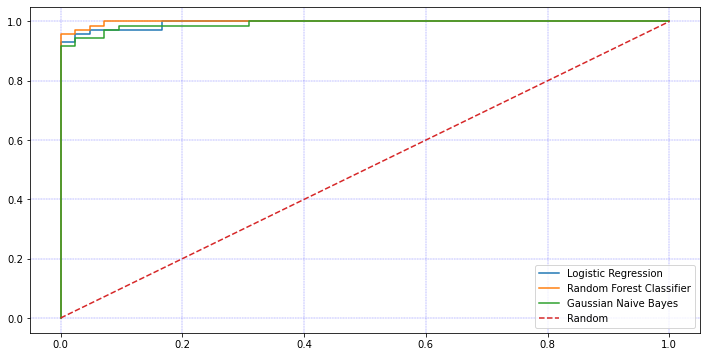

In [8]:
r_probs=[0 for i in range(len(y_test))]
y1_pred_prob=model1.predict_proba(X_test)[::,1]
y2_pred_prob=model2.predict_proba(X_test)[::,1]
y3_pred_prob=model3.predict_proba(X_test)[::,1]

print(model1.predict_proba(X_test))
print(y1_pred_prob)
print(y_test)

fpr1, tpr1, _a = metrics.roc_curve(y_test,  y1_pred_prob)
fpr2,tpr2,_b= metrics.roc_curve(y_test,  y2_pred_prob)
fpr3,tpr3,_c= metrics.roc_curve(y_test,  y3_pred_prob)
fpr4,tpr4,_d= metrics.roc_curve(y_test,  r_probs)

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(fpr2,tpr2,label="Logistic Regression")
plt.plot(fpr1,tpr1,label="Random Forest Classifier")
plt.plot(fpr3,tpr3,label="Gaussian Naive Bayes")
plt.plot(fpr4,tpr4,'--',label="Random")

plt.legend(loc=4)
plt.grid(color='b', ls = '-.', lw = 0.25)
plt.show()